In [1]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

In [2]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

In [3]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=3, activation="relu", padding="same", input_shape=(28, 28, 1)))

C:\Users\kimhu\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
model.add(keras.layers.MaxPooling2D(2))

In [5]:
model.add(keras.layers.Conv2D(64, kernel_size=3, activation="relu", padding="same"))
model.add(keras.layers.MaxPooling2D(2))

In [6]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation="softmax"))

In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │       313,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 333,526 (1.27 MB)

 Trainable params: 333,526 (1.27 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
keras.utils.plot_model(model)

AttributeError: module 'pydot' has no attribute 'InvocationException'

In [11]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
checkpoint_cb = keras.callbacks.ModelCheckpoint("best-cnn-model.keras")
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history = model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7380 - loss: 0.7283 - val_accuracy: 0.8790 - val_loss: 0.3360
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.8715 - loss: 0.3600 - val_accuracy: 0.8959 - val_loss: 0.2796
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8922 - loss: 0.2975 - val_accuracy: 0.9013 - val_loss: 0.2629
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9047 - loss: 0.2635 - val_accuracy: 0.9066 - val_loss: 0.2436
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9116 - loss: 0.2357 - val_accuracy: 0.9152 - val_loss: 0.2321
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9187 - loss: 0.2220 - val_accuracy: 0.9099 - val_loss: 0.2418
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9267 - loss: 0.2006 - val_accuracy: 0.9195 - val_loss: 0.2251
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9323 - loss: 0

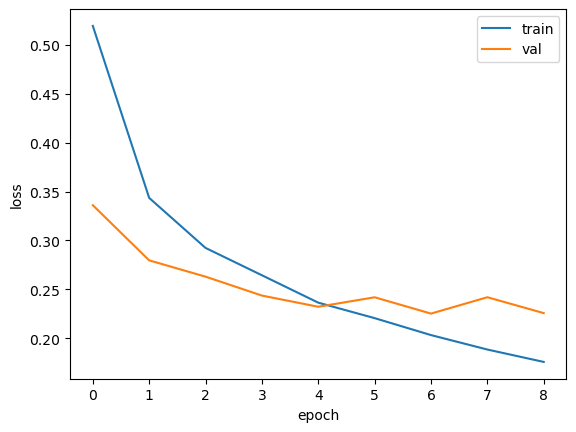

In [12]:
import matplotlib.pyplot as plt
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend(["train", "val"])
plt.show()

In [13]:
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9222 - loss: 0.2166


[0.22514402866363525, 0.9194999933242798]

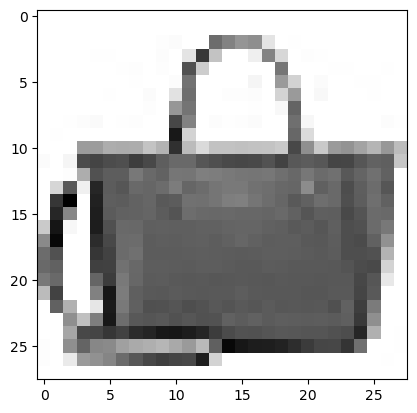

In [14]:
plt.imshow(val_scaled[0].reshape(28, 28), cmap="gray_r")
plt.show()

In [15]:
preds = model.predict(val_scaled[0:1])
print(preds)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
[[8.0684262e-17 1.6301844e-23 2.4753738e-22 3.0969157e-20 1.2066059e-18
  5.1376519e-16 1.7758699e-17 4.9866448e-20 1.0000000e+00 3.0728889e-18]]


Text(0.5, 0, 'class')

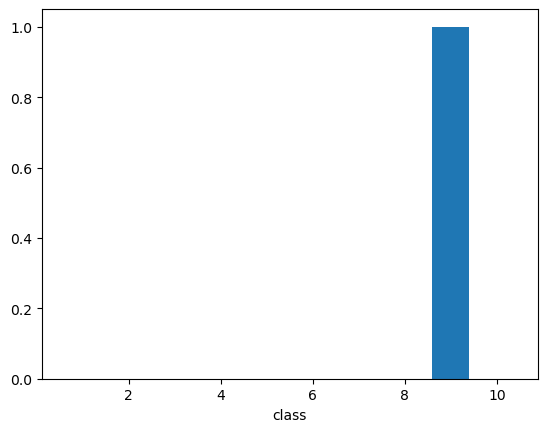

In [16]:
plt.bar(range(1, 11), preds[0])
plt.xlabel("class")

In [17]:
classes = ["티셔츠", "바지", "스웨터", "드레스", "코트", "샌들", "셔츠", "스니커즈", "가방", "앵클 부츠"]

In [18]:
import numpy as np
print(classes[np.argmax(preds)])

가방


In [19]:
test_scaled = test_input.reshape(-1, 28, 28, 1) / 255.0

In [20]:
model.evaluate(test_scaled, test_target)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9115 - loss: 0.2556


[0.24708473682403564, 0.9126999974250793]